In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = "D:\Sem 5\projects\FDS\liver_cirrhosis.csv"
data = pd.read_csv(file_path)


In [3]:
data.isnull().sum()

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64

In [9]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                   # Interquartile range
        lower_bound = Q1 - 1.5 * IQR    # Lower bound
        upper_bound = Q3 + 1.5 * IQR    # Upper bound
        
        # Filter the data
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Save the shape before removing outliers
shape_before = data.shape

# Remove outliers
data = remove_outliers_iqr(data, numeric_columns)

# Print the shapes
print(f"Shape before removing outliers: {shape_before}")
print(f"Shape after removing outliers: {data.shape}")

Shape before removing outliers: (5636, 19)
Shape after removing outliers: (5281, 19)


In [11]:

# Define features and target variable
X = data.drop('stage', axis=1)  # Features
y = data['stage']  # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Encoding categorical variables using OneHotEncoder
# This will convert each categorical column into multiple binary columns
column_transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')

# Apply the transformations
X_transformed = column_transformer.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you can proceed with training your models as shown previously


Accuracy: 0.8552507095553453
              precision    recall  f1-score   support

           1       0.86      0.87      0.87       379
           2       0.82      0.84      0.83       378
           3       0.89      0.86      0.87       300

    accuracy                           0.86      1057
   macro avg       0.86      0.86      0.86      1057
weighted avg       0.86      0.86      0.86      1057



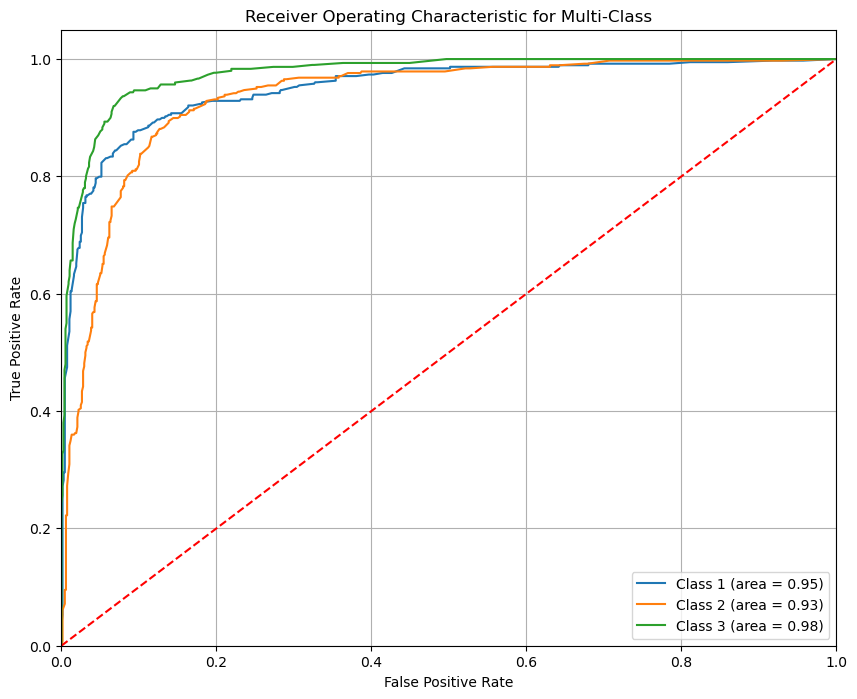

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
# Assuming y_test contains more than two classes
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=[1,2,3])  # Replace with your actual class labels
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_probs = model.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Accuracy: 0.7530747398297067
              precision    recall  f1-score   support

           1       0.77      0.76      0.77       379
           2       0.73      0.72      0.72       378
           3       0.76      0.79      0.77       300

    accuracy                           0.75      1057
   macro avg       0.75      0.76      0.75      1057
weighted avg       0.75      0.75      0.75      1057



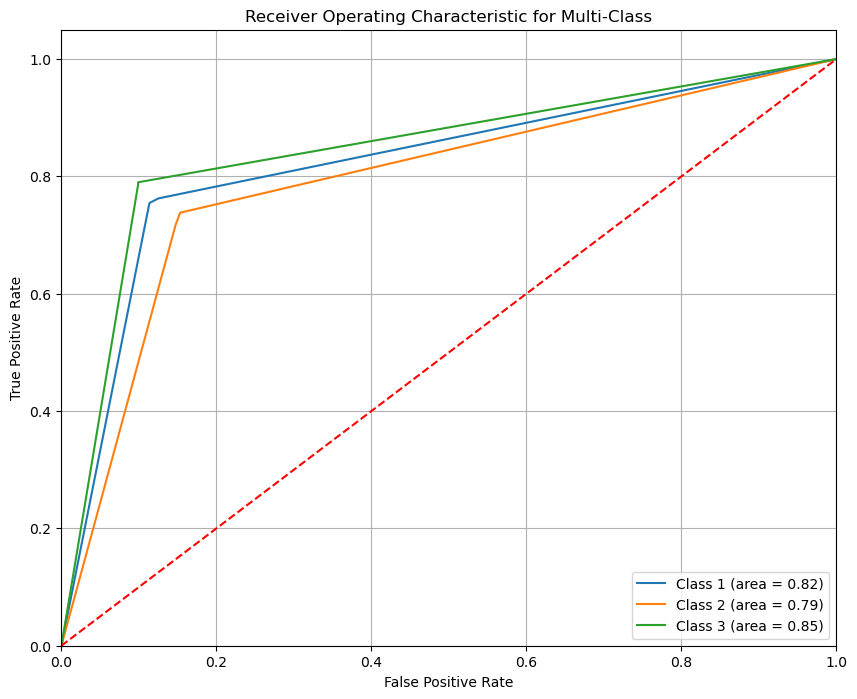

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
y_test_binarized = label_binarize(y_test, classes=[1,2,3])  # Replace with your actual class labels
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_probs = model.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8117313150425733
              precision    recall  f1-score   support

           1       0.78      0.88      0.83       379
           2       0.80      0.76      0.78       378
           3       0.87      0.79      0.83       300

    accuracy                           0.81      1057
   macro avg       0.82      0.81      0.81      1057
weighted avg       0.81      0.81      0.81      1057



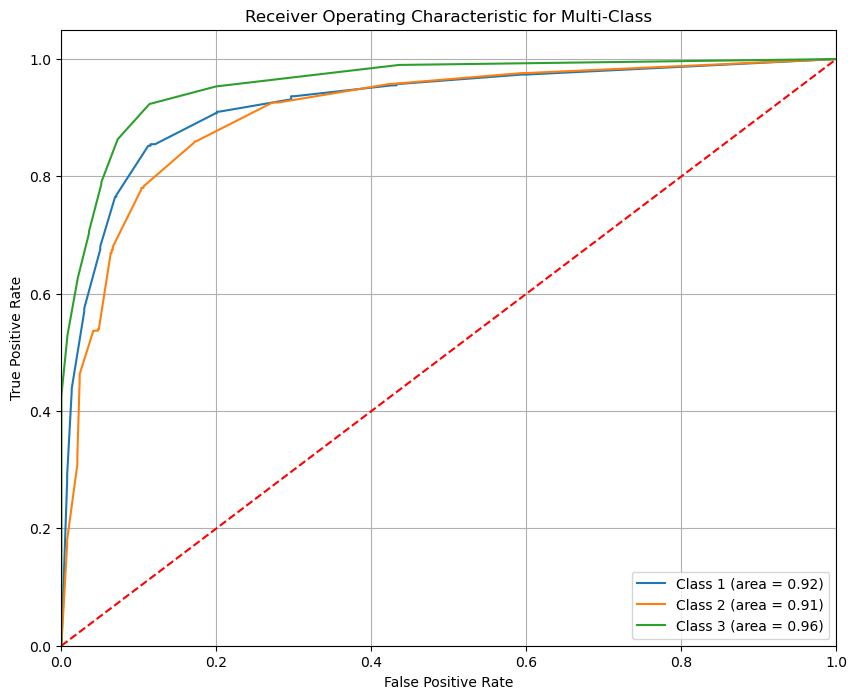

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Bagging Classifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Binarizing the labels for ROC curve computation
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])  # Replace with your actual class labels
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_probs = model.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.783349101229896
              precision    recall  f1-score   support

           1       0.78      0.81      0.80       379
           2       0.74      0.78      0.76       378
           3       0.84      0.76      0.80       300

    accuracy                           0.78      1057
   macro avg       0.79      0.78      0.78      1057
weighted avg       0.79      0.78      0.78      1057



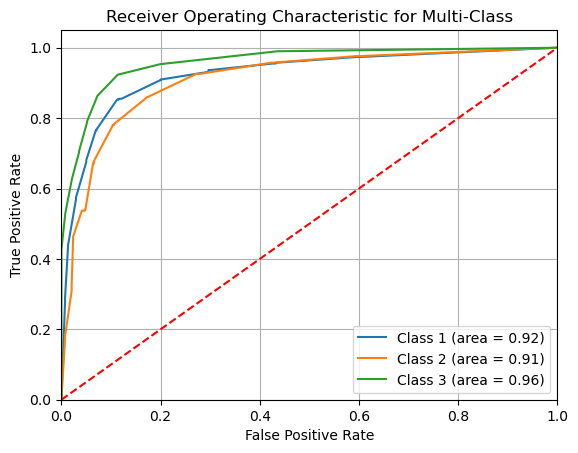

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Accuracy: 0.7019867549668874
              precision    recall  f1-score   support

           1       0.69      0.76      0.73       379
           2       0.66      0.66      0.66       378
           3       0.77      0.69      0.73       300

    accuracy                           0.70      1057
   macro avg       0.71      0.70      0.70      1057
weighted avg       0.70      0.70      0.70      1057



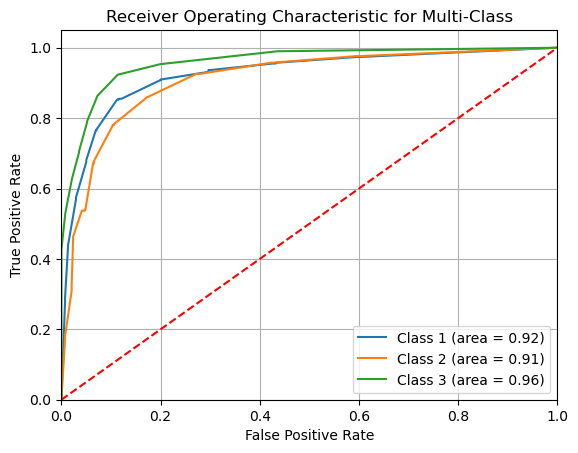

In [21]:
from sklearn.svm import SVC

# Support Vector Classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.7086092715231788
              precision    recall  f1-score   support

           1       0.69      0.76      0.72       379
           2       0.66      0.67      0.67       378
           3       0.82      0.68      0.74       300

    accuracy                           0.71      1057
   macro avg       0.72      0.71      0.71      1057
weighted avg       0.71      0.71      0.71      1057



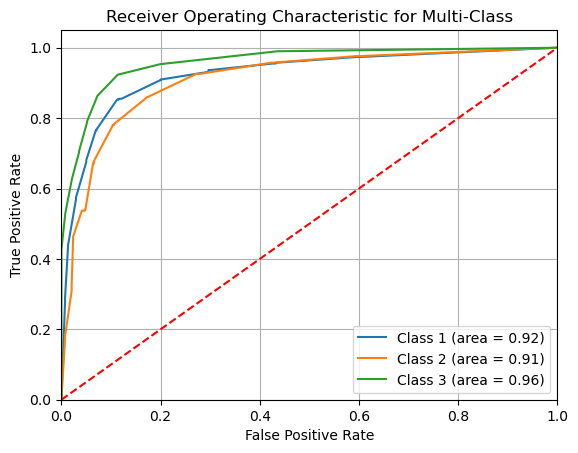

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.5175023651844843
              precision    recall  f1-score   support

           1       0.47      0.84      0.60       379
           2       0.58      0.23      0.33       378
           3       0.63      0.47      0.54       300

    accuracy                           0.52      1057
   macro avg       0.56      0.51      0.49      1057
weighted avg       0.55      0.52      0.49      1057



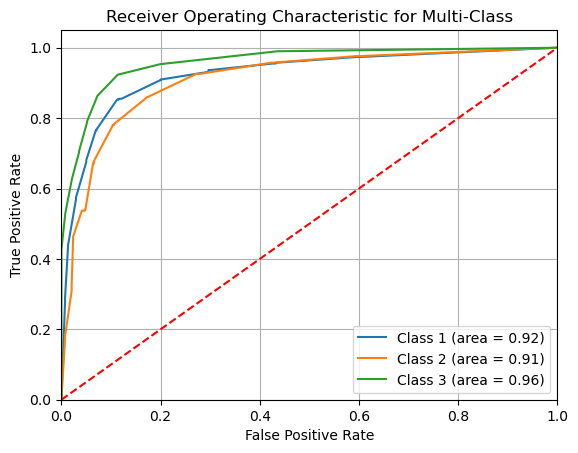

In [25]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7076631977294229
              precision    recall  f1-score   support

           1       0.71      0.77      0.74       379
           2       0.67      0.66      0.67       378
           3       0.76      0.69      0.72       300

    accuracy                           0.71      1057
   macro avg       0.71      0.71      0.71      1057
weighted avg       0.71      0.71      0.71      1057



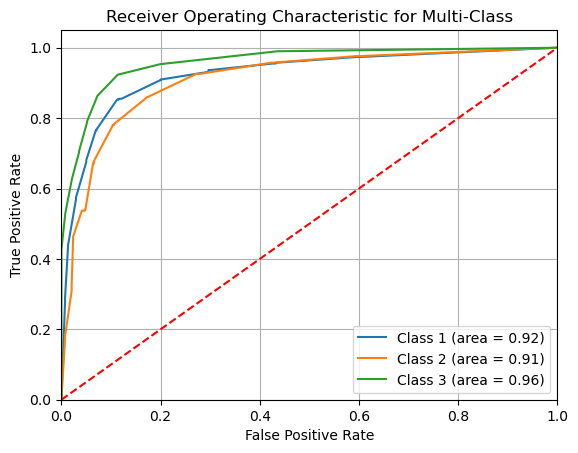

In [27]:
from sklearn.neural_network import MLPClassifier

# Neural Network (MLP)
model = MLPClassifier(random_state=42, max_iter=300)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 4224, number of used features: 20
[LightGBM] [Info] Start training from score -1.029998
[LightGBM] [Info] Start training from score -1.011601
[LightGBM] [Info] Start training from score -1.275268
Accuracy: 0.8845789971617786
              precision    recall  f1-score   support

           1       0.89      0.88      0.89       379
           2       0.85      0.87      0.86       378
           3       0.92      0.91      0.91       300

    accuracy                           0.88      1057
   macro avg       0.89      0.89      0.89      1057
weighted avg       0.88      0.88      0.88      1057



C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


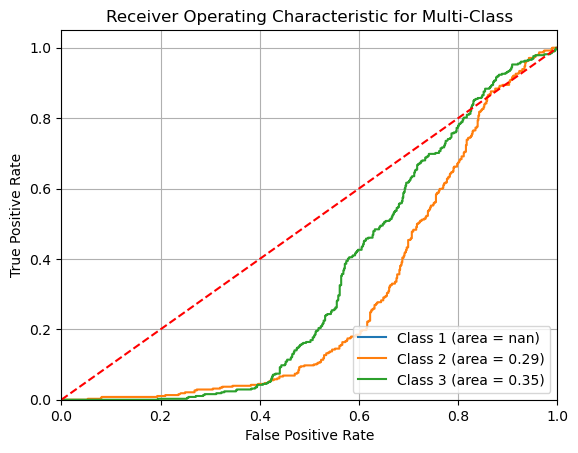

In [29]:
!pip install lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# LightGBM model
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# For ROC-AUC, we need probability predictions
y_probs = model.predict_proba(X_test)

# Binarize y_test for multi-class ROC AUC computation
n_classes = len(set(y_test))
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8751182592242195
              precision    recall  f1-score   support

           1       0.87      0.89      0.88       379
           2       0.85      0.85      0.85       378
           3       0.91      0.88      0.90       300

    accuracy                           0.88      1057
   macro avg       0.88      0.88      0.88      1057
weighted avg       0.88      0.88      0.88      1057



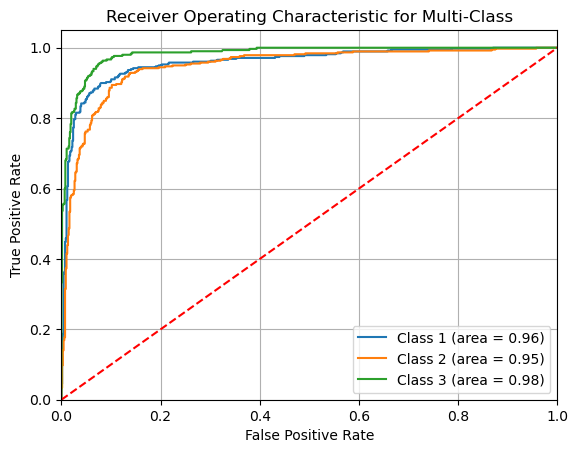

In [31]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# CatBoost model
model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress output during training
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# For ROC-AUC, we need probability predictions
y_probs = model.predict_proba(X_test)

# Binarize y_test for multi-class ROC AUC computation
n_classes = len(set(y_test))
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (area = {roc_auc:.2f})')

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 0.49304742492445514


In [35]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}')

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f'Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}')


Ridge Regression MSE: 0.49304197607421535
Lasso Regression MSE: 0.5313415272502027


In [37]:
from sklearn.decomposition import PCA
X_scaled = scaler.fit_transform(X_transformed)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Now X_pca is ready for any further modeling or visualization
print(X_pca)


[[ 1.90863772 -1.96413569]
 [ 1.89298469 -0.88185211]
 [ 2.3230719   0.0878684 ]
 ...
 [-1.30820443 -2.32876071]
 [ 0.91743087  2.56765617]
 [ 1.27949104  0.01434068]]


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


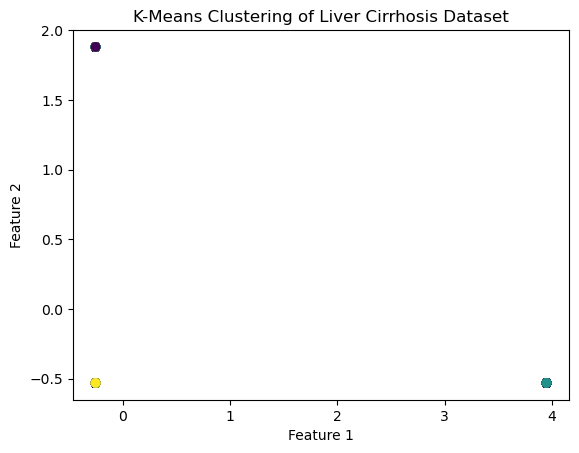

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# For visualization: assuming the dataset has been reduced to 2 dimensions, or using PCA
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of Liver Cirrhosis Dataset')
plt.show()

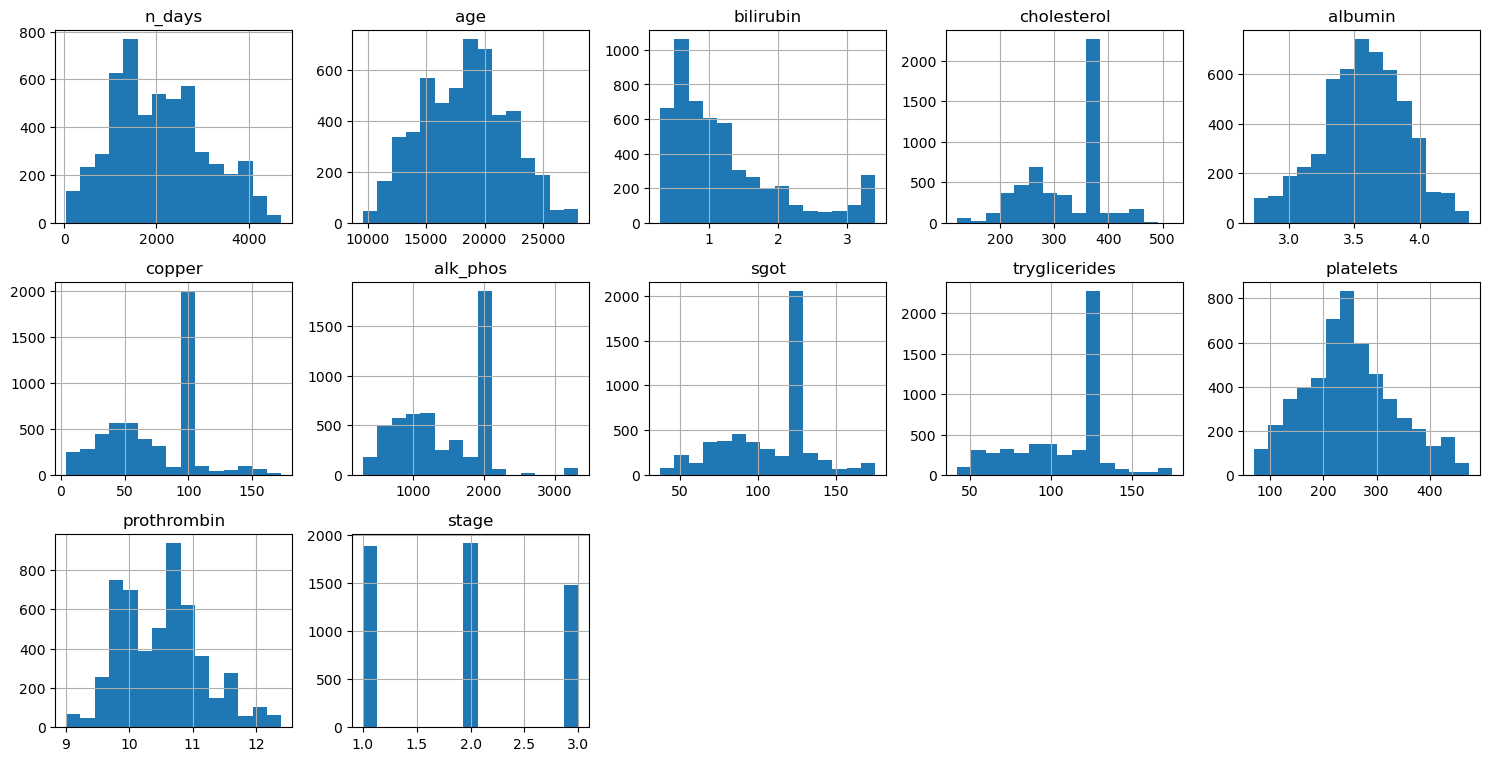

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each feature
data.hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.tight_layout()
plt.show()


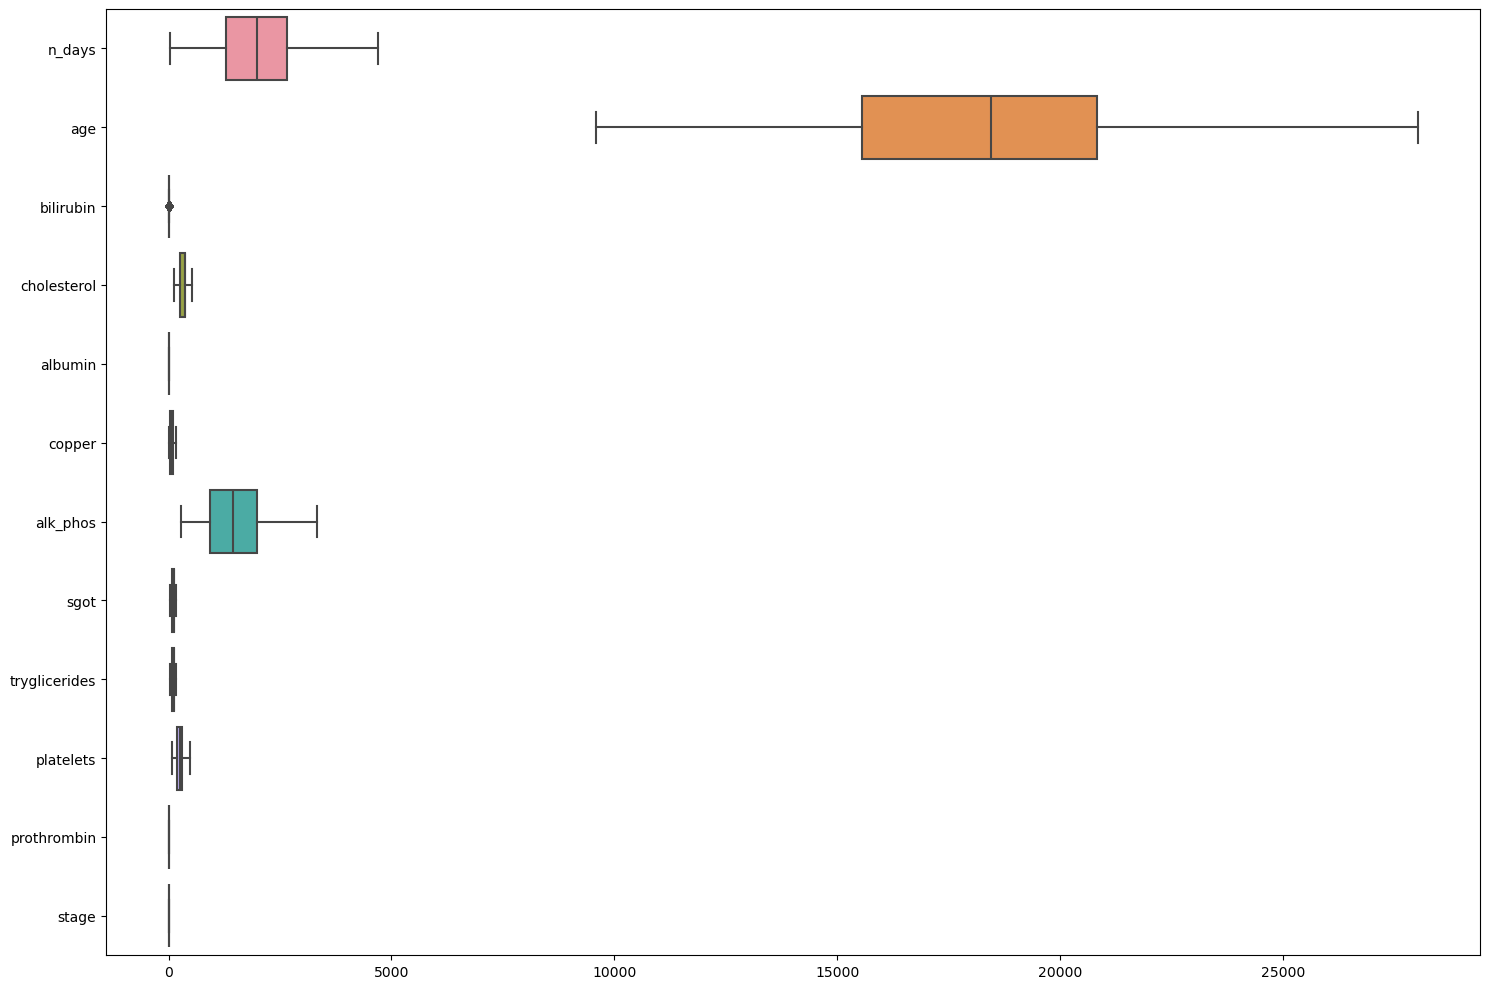

In [43]:
# Boxplot for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h")
plt.tight_layout()
plt.show()


Shape of transformed data: (5281, 21)
Number of feature names: 20


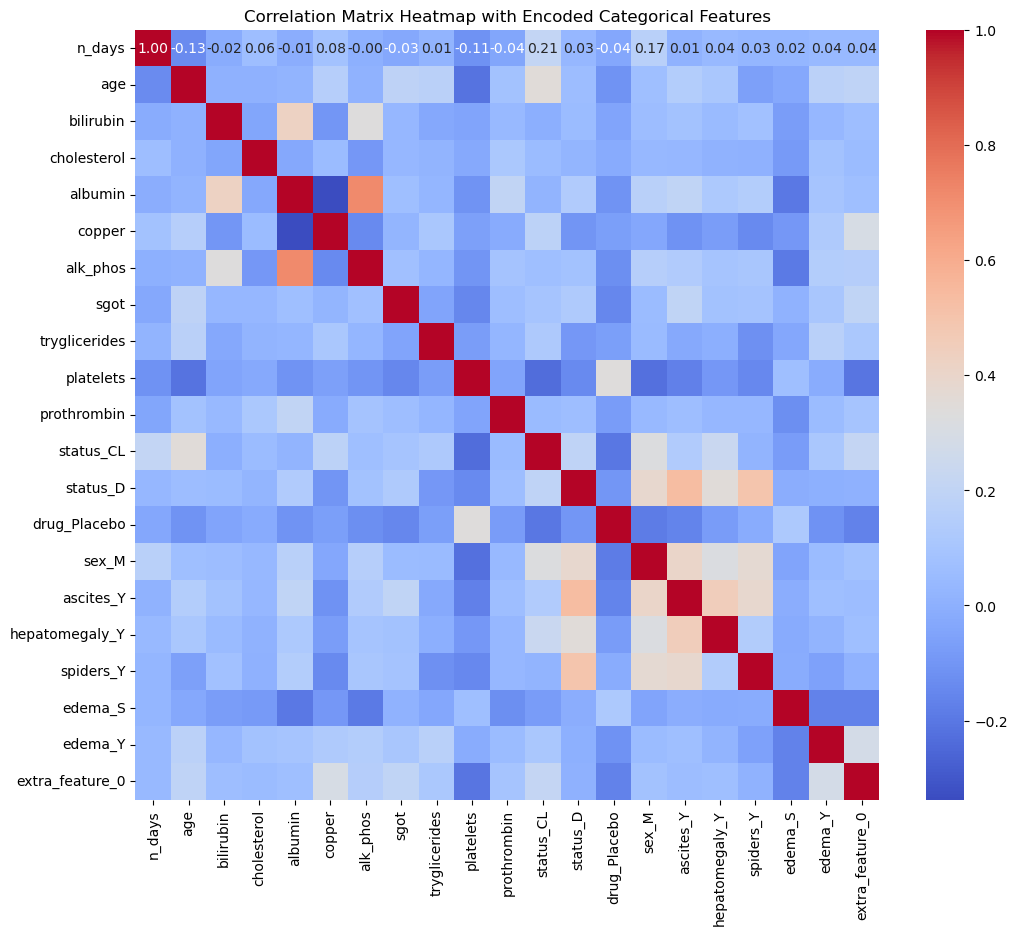

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data_transformed = column_transformer.fit_transform(data)

# Get names for the transformed features
encoded_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(encoded_feature_names)

# Debugging outputs
print(f"Shape of transformed data: {data_transformed.shape}")
print(f"Number of feature names: {len(all_feature_names)}")

# Ensure the number of features matches
if data_transformed.shape[1] != len(all_feature_names):
    # Add placeholder names for the additional columns
    additional_names = [f'extra_feature_{i}' for i in range(data_transformed.shape[1] - len(all_feature_names))]
    all_feature_names.extend(additional_names)

# Re-assert after adjustment
assert data_transformed.shape[1] == len(all_feature_names), "Mismatch in number of features and column names."

# Create DataFrame with transformed data
data_transformed_data = pd.DataFrame(data_transformed, columns=all_feature_names)

# Convert all data to numeric, replacing NaNs with zeros
data_transformed_data_numeric = data_transformed_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Correlation matrix
corr_matrix = data_transformed_data_numeric.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap with Encoded Categorical Features")
plt.show()

C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

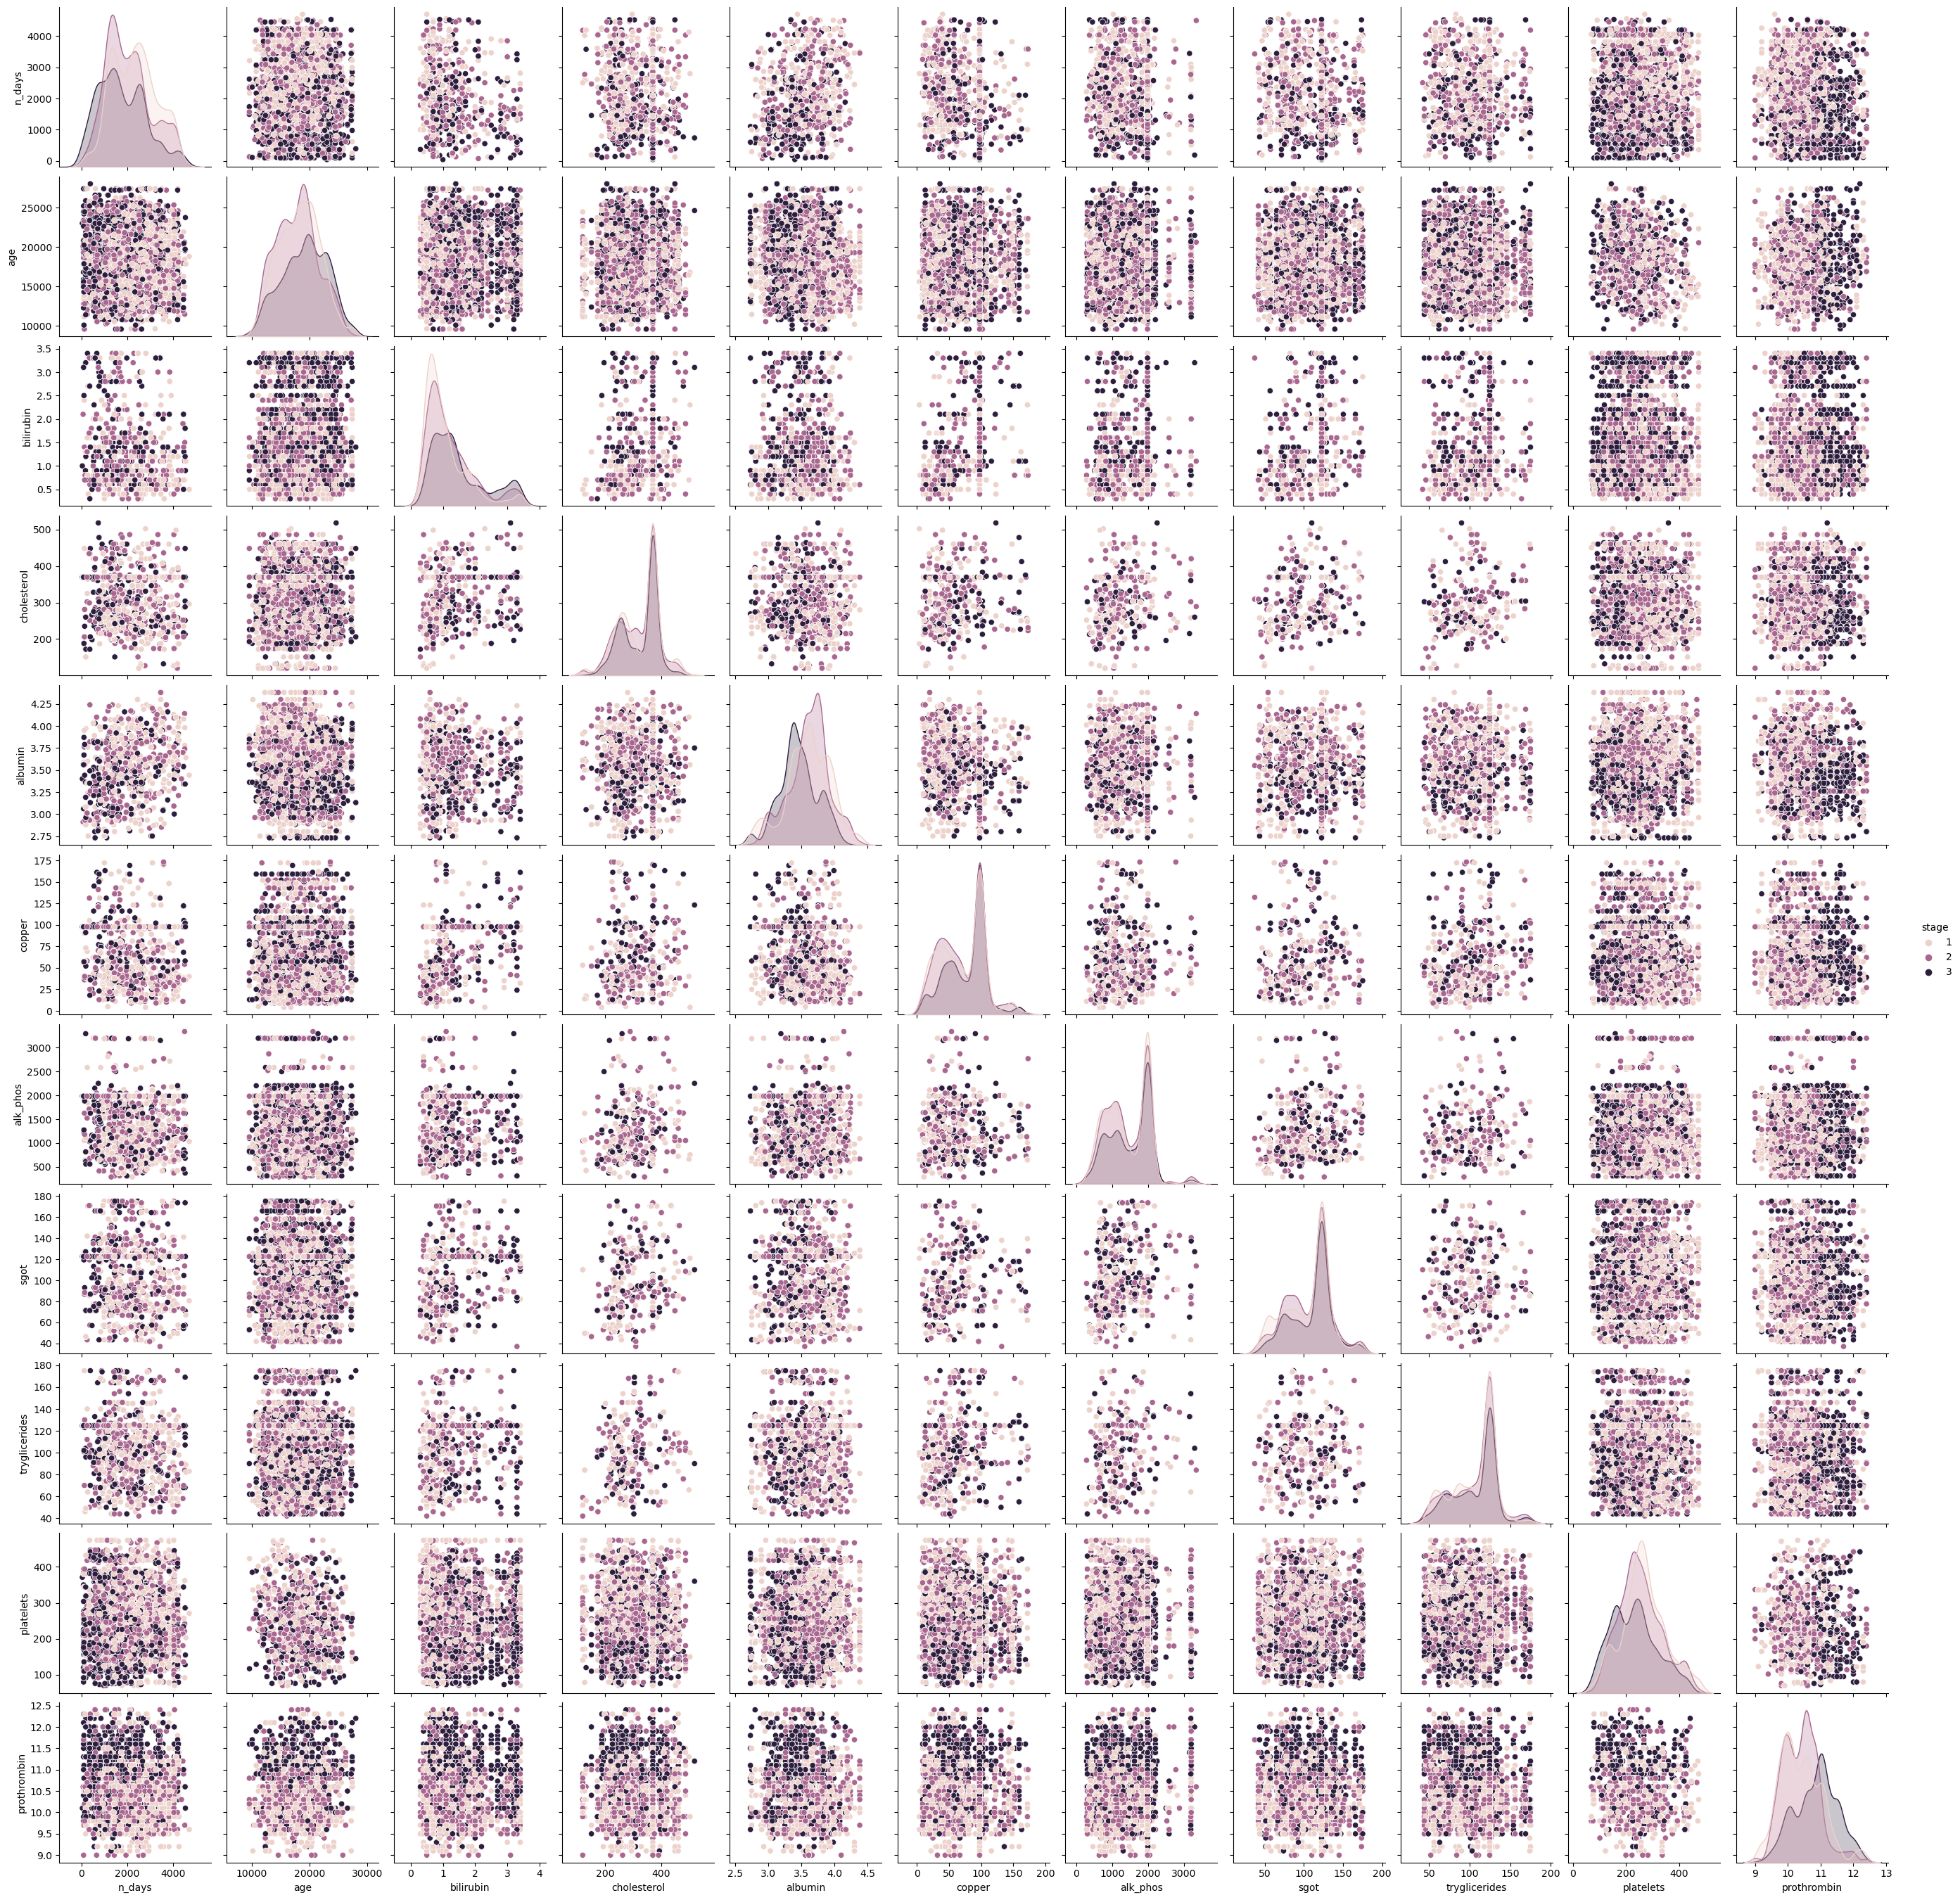

In [47]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='stage', diag_kind="kde")
plt.show()


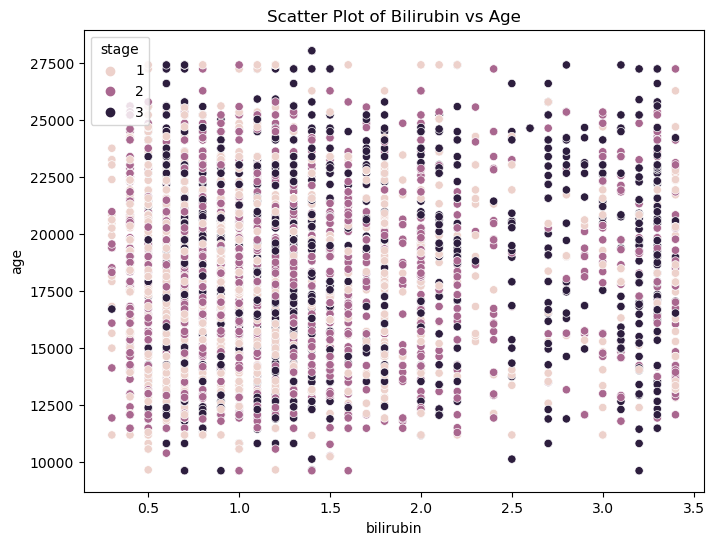

In [49]:
# Scatter plot between Bilirubin and Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bilirubin', y='age', hue='stage', data=data)
plt.title("Scatter Plot of Bilirubin vs Age")
plt.show()


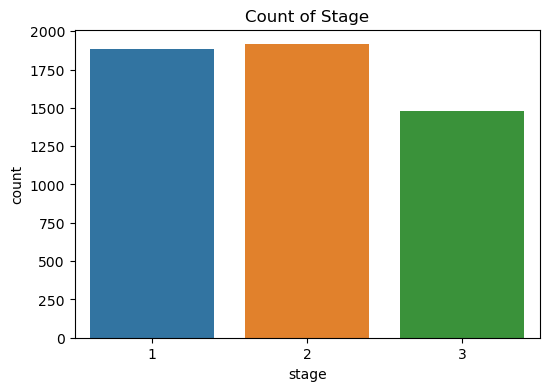

In [51]:
# Count plot for 'Status' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='stage', data=data)
plt.title("Count of Stage")
plt.show()


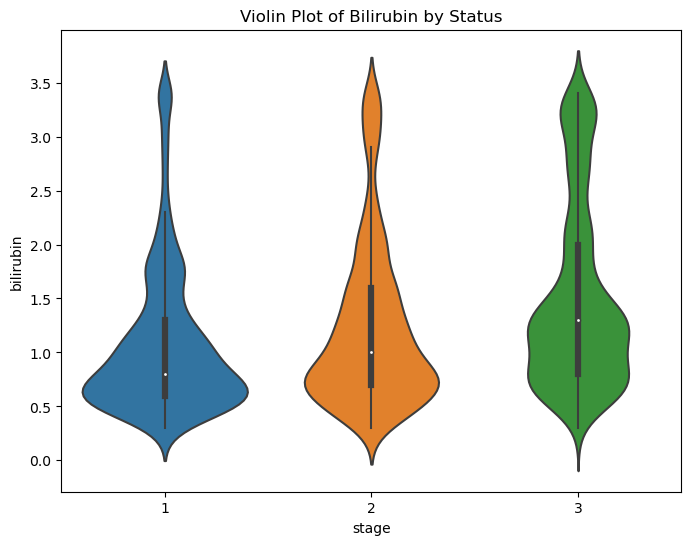

In [53]:
# Violin plot for 'Bilirubin' across different 'Status'
plt.figure(figsize=(8, 6))
sns.violinplot(x='stage', y='bilirubin', data=data)
plt.title("Violin Plot of Bilirubin by Status")
plt.show()


C:\Users\venka\AppData\Local\Temp\ipykernel_25068\3264364153.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='stage', y='albumin', data=data, ci="sd")


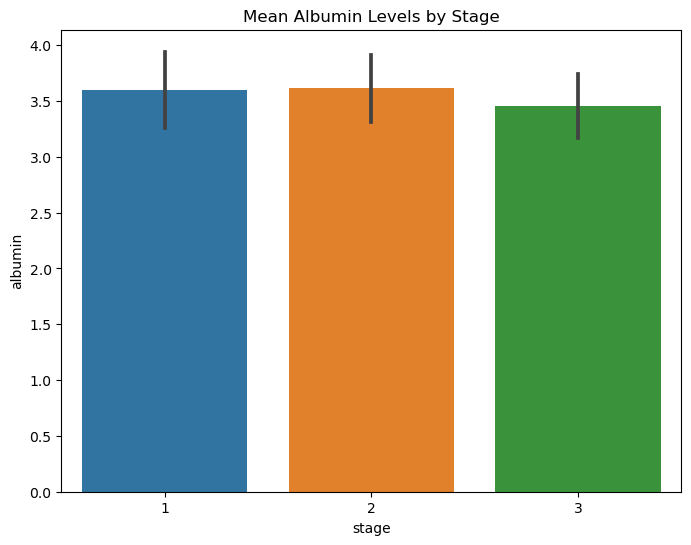

In [55]:
# Bar plot for mean Albumin levels by Status
plt.figure(figsize=(8, 6))
sns.barplot(x='stage', y='albumin', data=data, ci="sd")
plt.title("Mean Albumin Levels by Stage")
plt.show()


C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


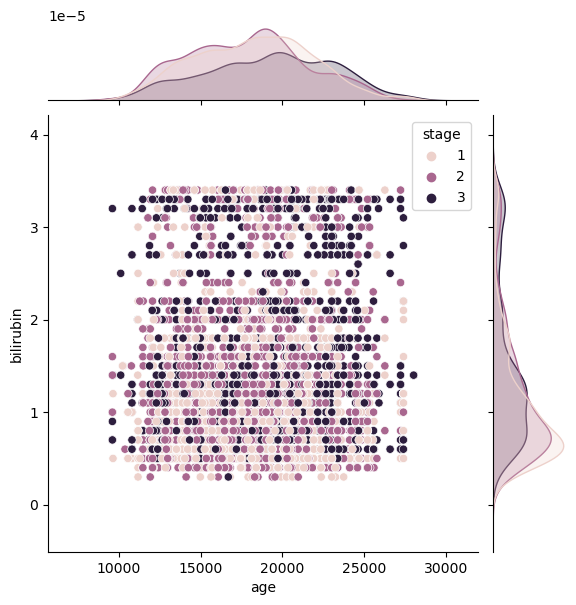

In [57]:
# Joint plot of Age and Bilirubin
sns.jointplot(x='age', y='bilirubin', data=data, kind="scatter", hue='stage')
plt.show()


C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


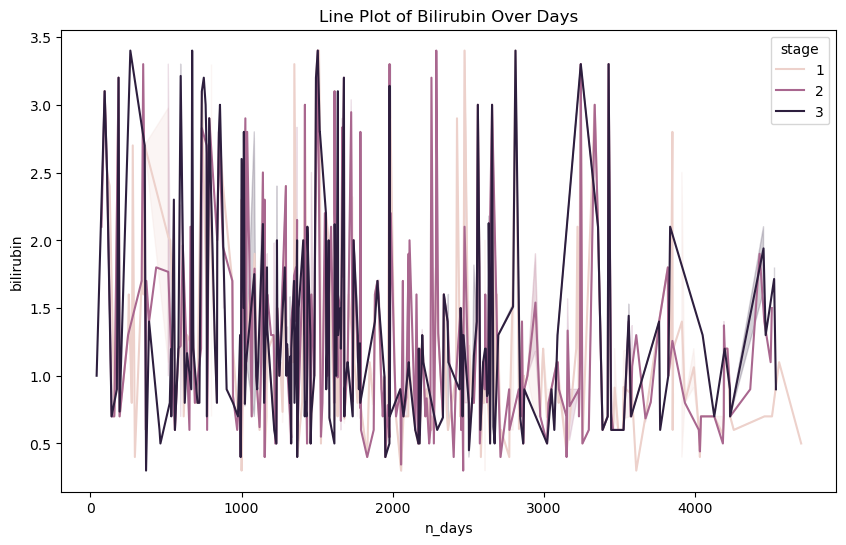

In [59]:
# Example line plot for the progression of a variable over time or stages
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.sort_values(by='n_days'), x='n_days', y='bilirubin', hue='stage')
plt.title("Line Plot of Bilirubin Over Days")
plt.show()
